# Матренин Василий Николаевич. Б01-008
# Лабораторная работа \#1

In [94]:
import numpy as np

def runge_kutta_iteration(f, h, prev_x, prev_y) :
    k1 = f(prev_x, prev_y)
    k2 = f(prev_x + h/2, prev_y + k1*h/2)
    k3 = f(prev_x + h/2, prev_y + k2*h/2)
    k4 = f(prev_x + h, prev_y + k3*h)
    
    return prev_y + (k1 + 2*k2 + 2*k3 + k4)*h/6

def adams_3_iteration(f, h, prev_x, prev_y) :
    k1 = 23.0/12
    k2 = -4.0/3
    k3 = 5.0/12
    
    return prev_y[0] + k1*h*f(prev_x[0], prev_y[0]) + k2*h*f(prev_x[1], prev_y[1]) + k3*h*f(prev_x[2], prev_y[2])

y0_0 = 2
y1_0 = 0

def func(e, x, y) :
    y0 = y[0]
    y1 = y[1]
    return np.array([y1, e*(1-y0**2)*y1 - y0])


In [96]:
import numpy as np
import functools
import matplotlib.pyplot as plt

def display_runge_kutta_results(e, dt) :
    func_for_e = functools.partial(func, e)

    t = np.arange(start=dt, stop=100, step=dt)
    y = np.zeros_like(t)
    y_deriv = np.zeros_like(t)

    y[0] = y0_0
    y_deriv[0] = y1_0

    for k in range(1, t.size) :
        runge_kutta_value = runge_kutta_iteration(func_for_e, dt, t[k-1], [y[k-1], y_deriv[k-1]])
        y[k] = runge_kutta_value[0]
        y_deriv[k] = runge_kutta_value[1]

    plt.figure(figsize=[12, 5], dpi=100)
    plt.plot(t, y,'b')
    plt.xlabel("$t$")
    plt.ylabel("$y$")
    plt.title("Runge-Kutta for e = %f" % e)
    plt.grid()

    plt.show()
    
    return [t, y]

def display_adams_results(e, dt) :
    func_for_e = functools.partial(func, e)

    t = np.arange(start=dt, stop=100, step=dt)
    y = np.zeros_like(t)
    y_deriv = np.zeros_like(t)

    y[0] = y0_0
    y_deriv[0] = y1_0

    for k in range(1, 4) :
        runge_kutta_value = runge_kutta_iteration(func_for_e, dt, t[k-1], [y[k-1], y_deriv[k-1]])
        y[k] = runge_kutta_value[0]
        y_deriv[k] = runge_kutta_value[1]
        
    for k in range(4, t.size) :
        prev_t = [t[k-1], t[k-2], t[k-3]]
        prev_y = [[y[k-1], y_deriv[k-1]], [y[k-2], y_deriv[k-2]], [y[k-3], y_deriv[k-3]]]
        adams_3_value = adams_3_iteration(func_for_e, dt, prev_t, prev_y)
        y[k] = adams_3_value[0]
        y_deriv[k] = adams_3_value[1]

    plt.figure(figsize=[12, 5], dpi=100)
    plt.plot(t, y,'b')
    plt.xlabel("$t$")
    plt.ylabel("$y$")
    plt.title("Adams for e = %f" % e)
    plt.grid()

    plt.show()

    return [t, y]

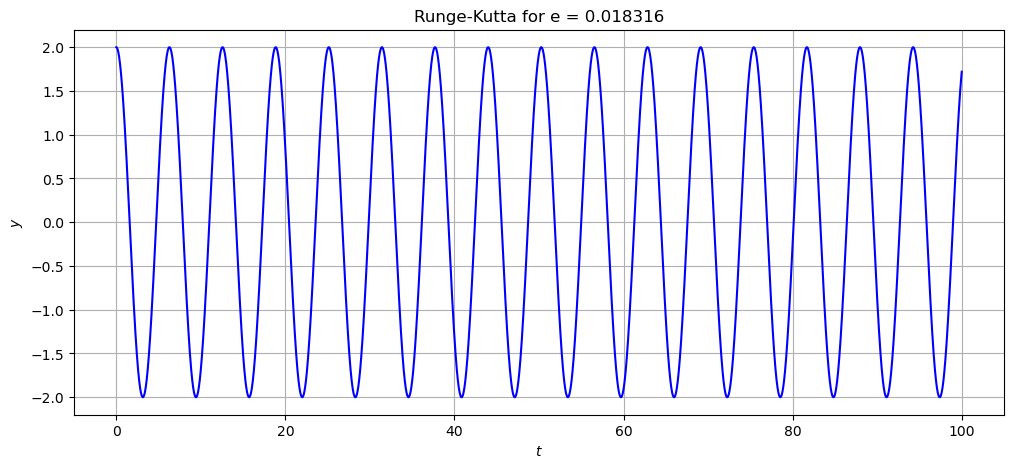

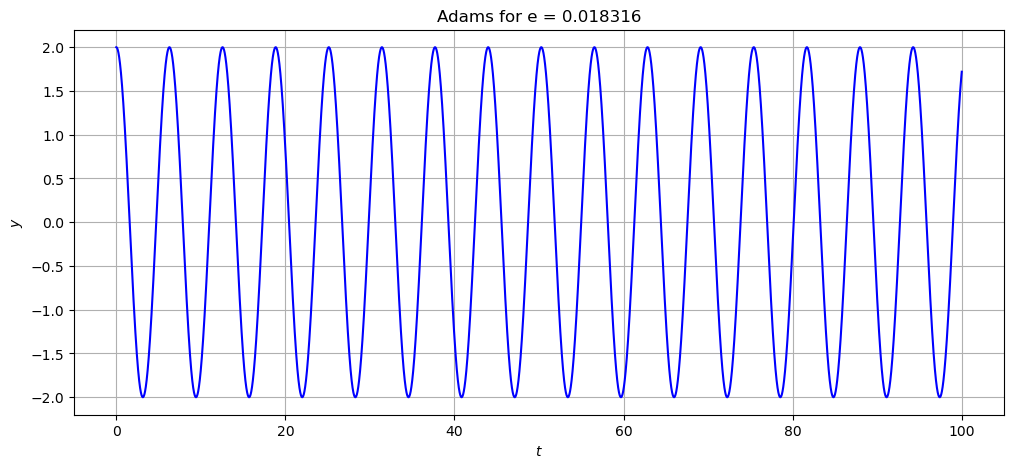

error:  2.97652952017693e-09


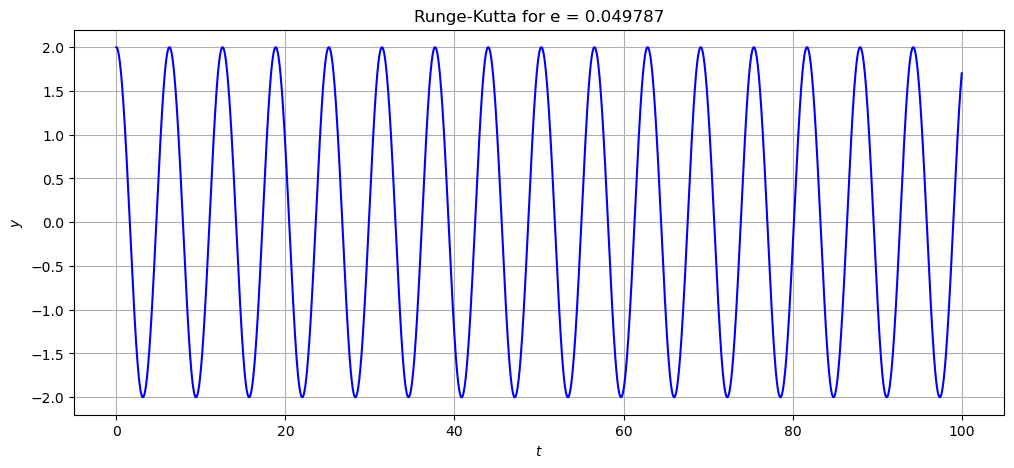

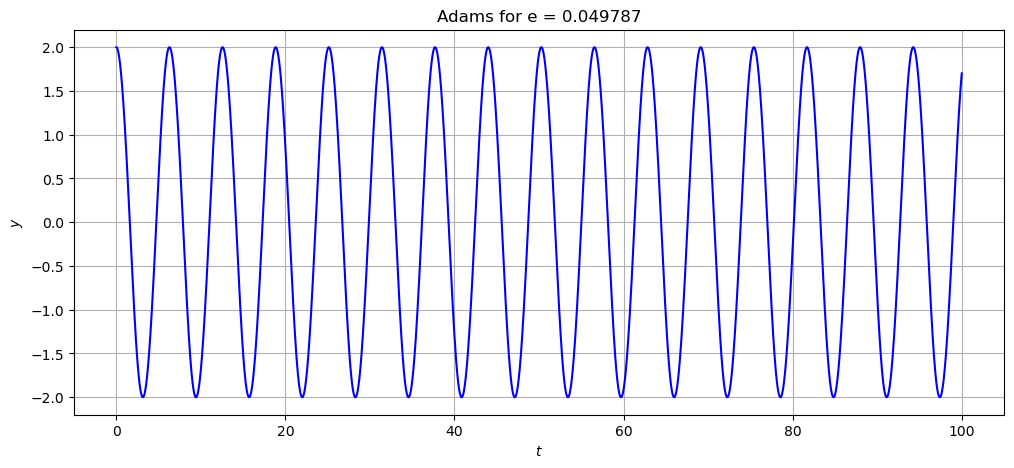

error:  1.5758586211530094e-09


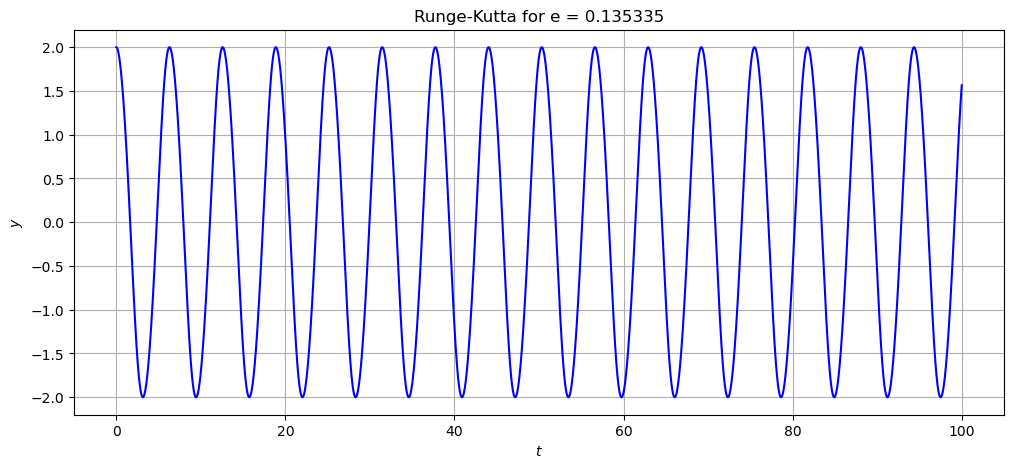

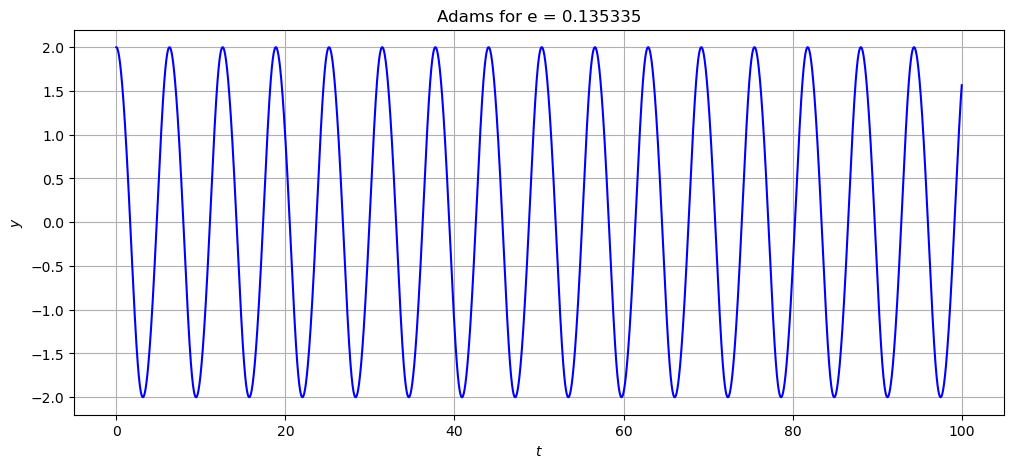

error:  1.1237845049221176e-09


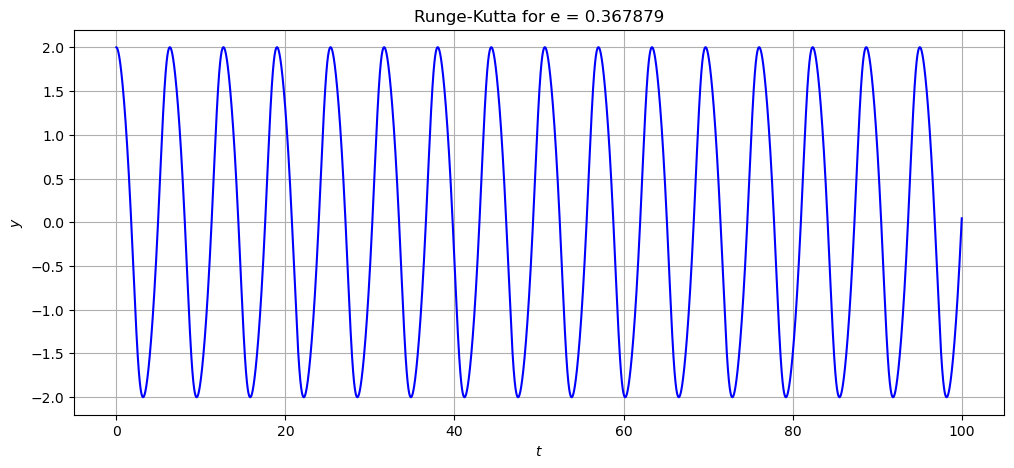

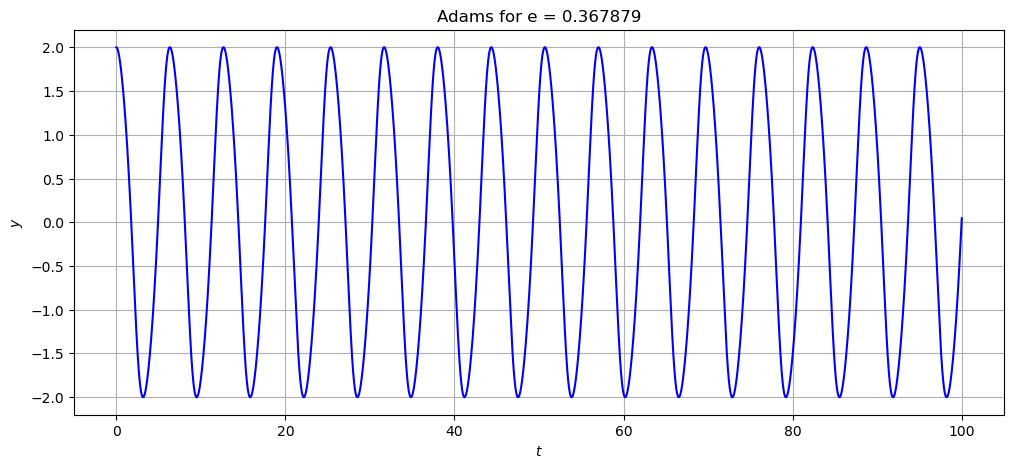

error:  3.227198592447782e-09


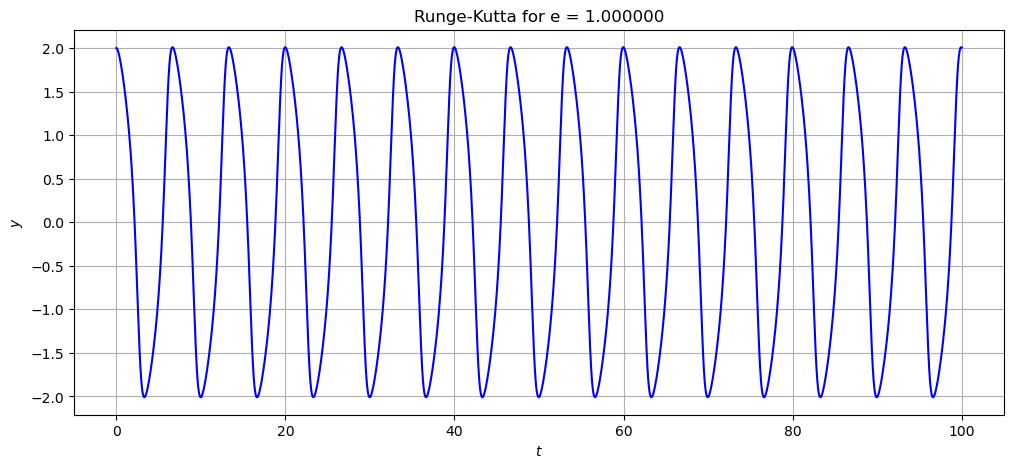

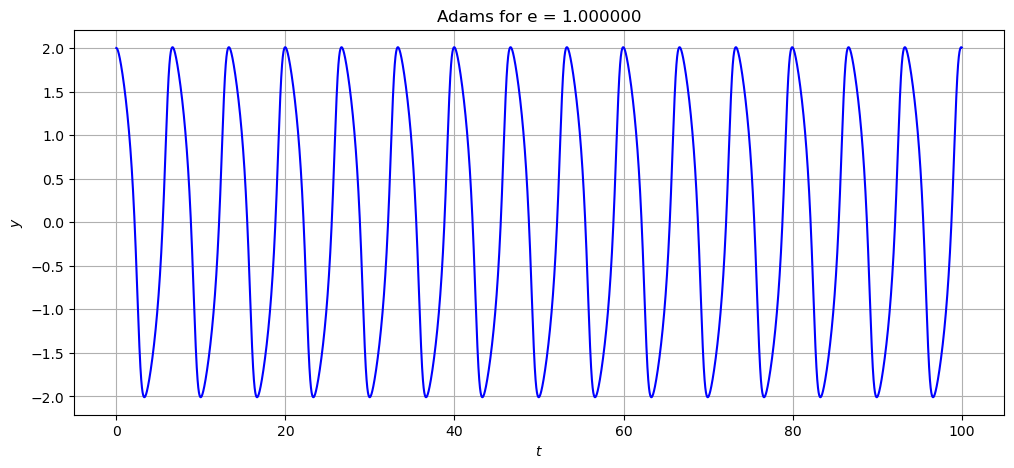

error:  2.1661111963111987e-08


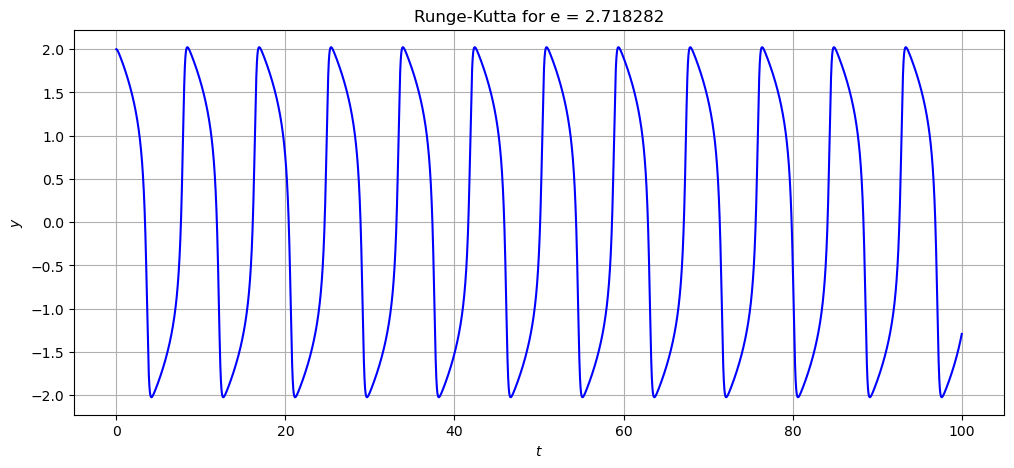

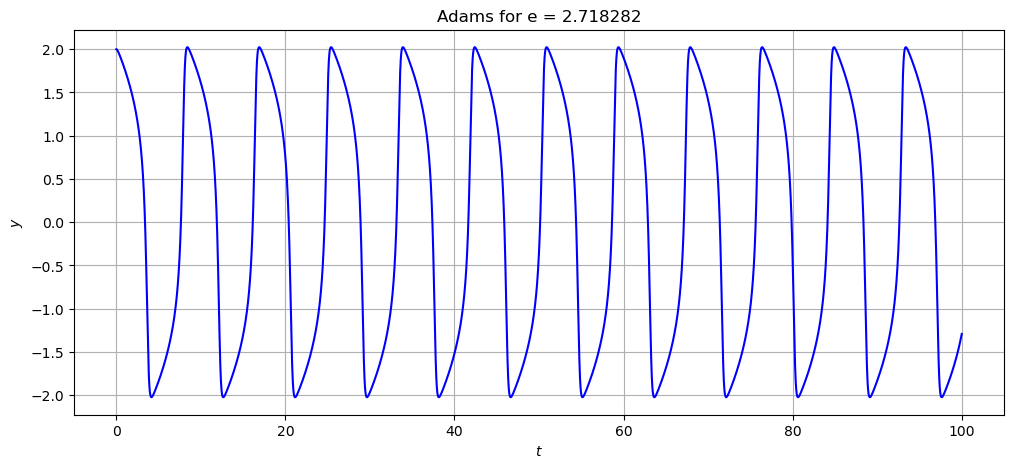

error:  2.9319215706737436e-07


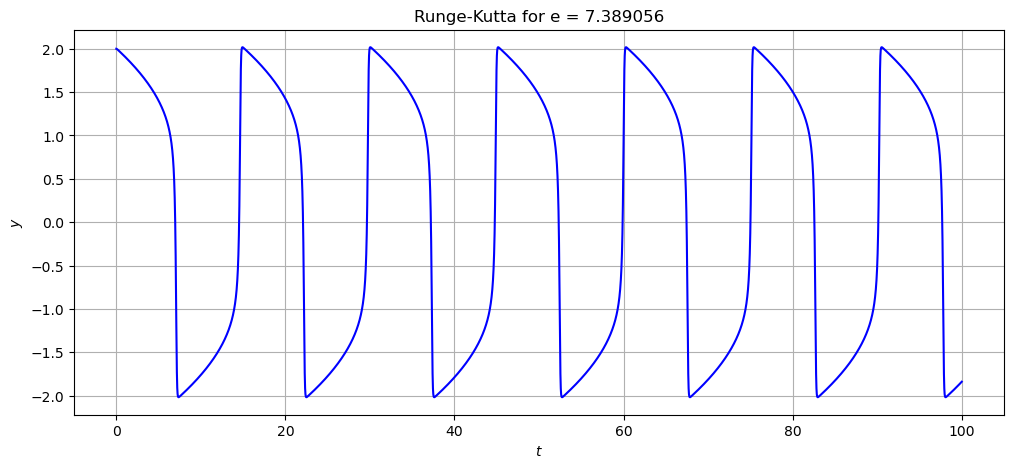

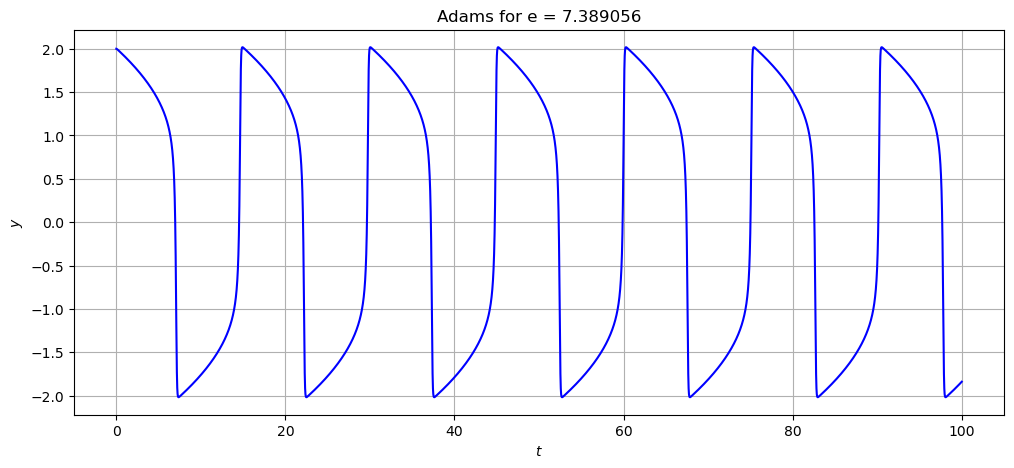

error:  6.262731602377995e-06


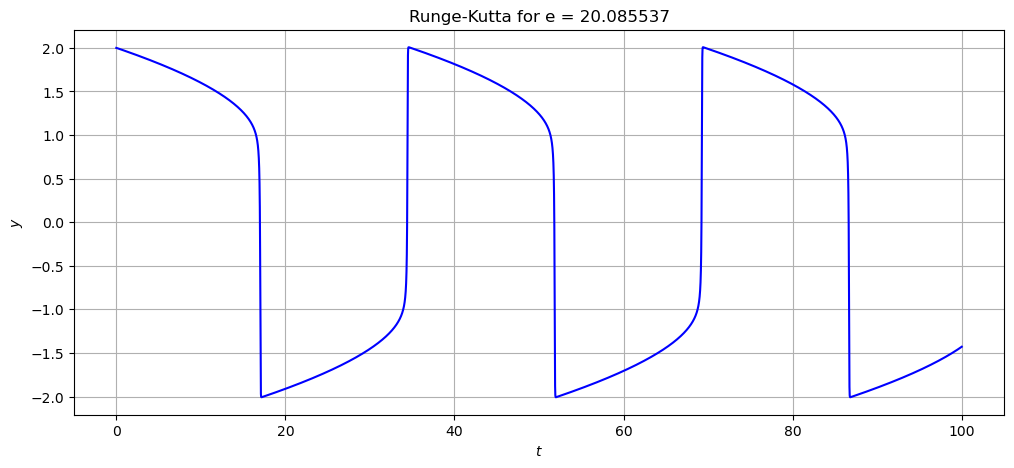

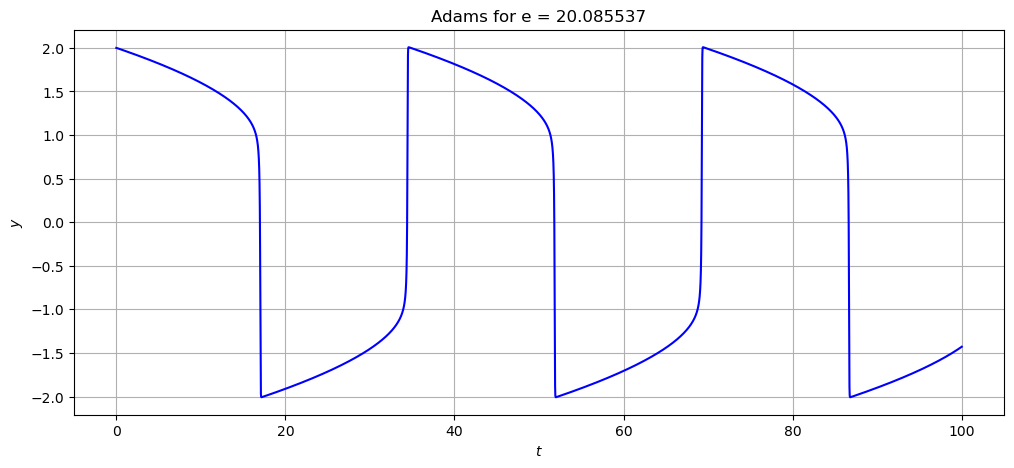

error:  0.00010023520119286551


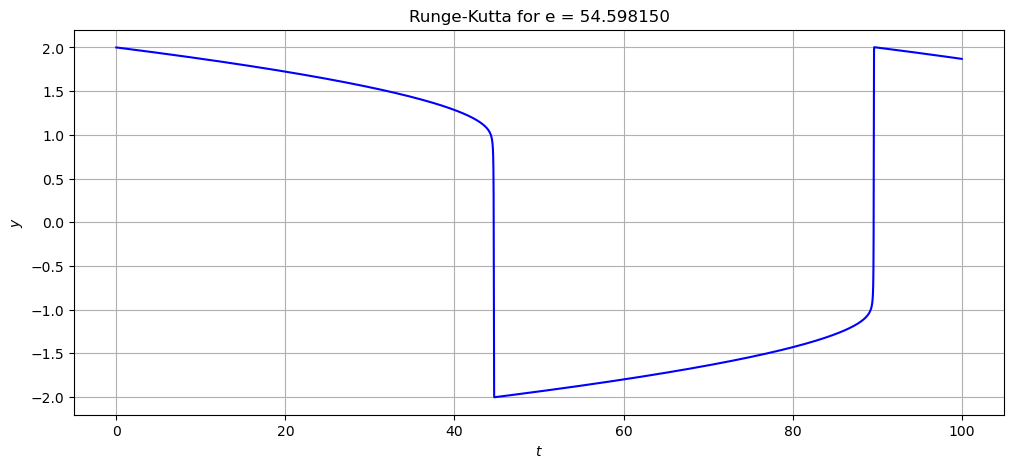

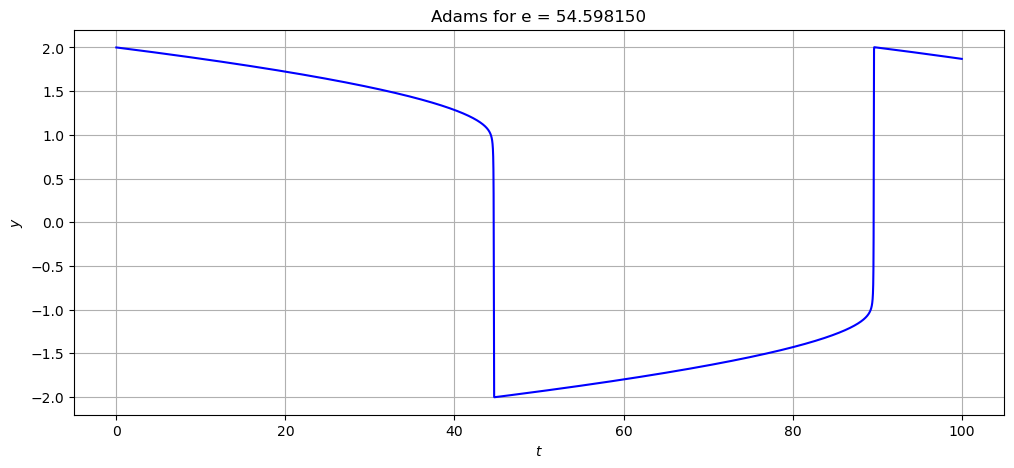

error:  0.0015561049428521774


In [104]:

dt = 0.00005
e_values = np.geomspace(np.exp(-4), np.exp(4), 9)
    
for e in e_values :
    runge_kutta_out = display_runge_kutta_results(e, dt)
    adams_out = display_adams_results(e, dt)
    y_diff = runge_kutta_out[1] - adams_out[1]
    
    error = np.sqrt(np.sum(y_diff * y_diff))
    print("error: ", error)
